In [1]:
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/ETH_USD.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-01-01,ETH,730.035168,736.709922,749.059799,721.920981
2021-01-02,ETH,771.475757,729.732567,784.506031,716.225886
2021-01-03,ETH,976.892681,771.794228,989.551795,765.723864
2021-01-04,ETH,1017.862399,971.642719,1151.069389,890.473806
2021-01-05,ETH,1123.162841,1041.496000,1126.870772,980.278064


<AxesSubplot:xlabel='Date'>

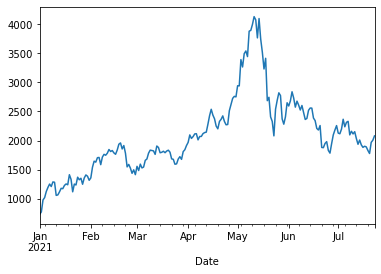

In [3]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

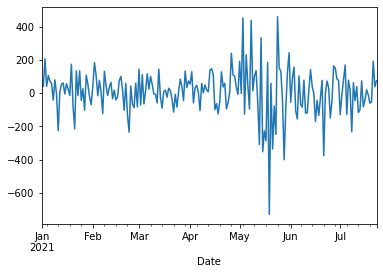

In [4]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

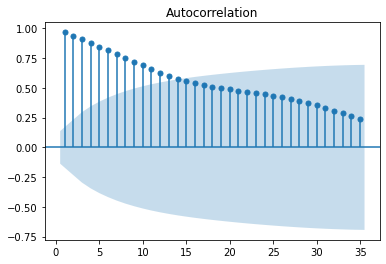

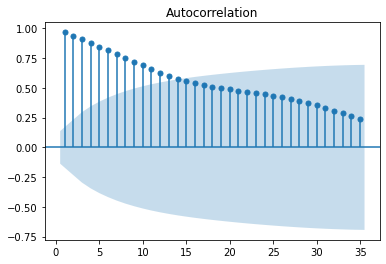

In [6]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=35)

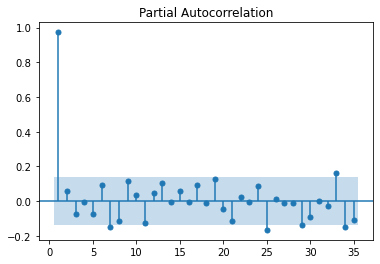

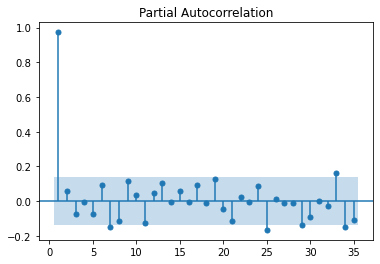

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(14, 2, 0))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
# Fit the model to the data
results = model.fit()

In [11]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  202
Model:                ARIMA(14, 2, 0)   Log Likelihood               -1275.525
Method:                       css-mle   S.D. of innovations            132.963
Date:                Tue, 03 Aug 2021   AIC                           2583.051
Time:                        20:07:04   BIC                           2635.983
Sample:                             2   HQIC                          2604.467
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1847      1.599     -0.115      0.908      -3.319       2.950
ar.L1.D2.y     -0.9619      0.070    -13.755      0.000      -1.099      -0.825
ar.L2.D2.y     -0.6950      0.097     -7.147      0.000      -0.886      -0.504
ar.L3.D2.y     -0.6240      0.108     -5.754      0.000      -0.837      -0.411
ar.L4.D2.y     -0.5159      0.117     -4.406      0.000      -0.745      -0.286
ar.L5.D2.y     -0.5248      0.123     -4.271      0.000      -0.766      -0.284
ar.L6.D2.y     -0.2539      0.128     -1.989      0.047      -0.504      -0.004
ar.L7.D2.y     -0.1032      0.128     -0.807      0.420      -0.354       0.147
ar.L8.D2.y     -0.2465      0.128     -1.930      0.054      -0.497       0.004
ar.L9.D2.y     -0.2785      0.127     -2.187      0.029      -0.528      -0.029
ar.L10.D2.y    -0.1437      0.123     -1.172      0.241      -0.384       0.097
ar.L11.D2.y    -0.1715      0.117     -1.468      0.142      -0.400       0.058
ar.L12.D2.y    -0.2255      0.108     -2.085      0.037      -0.437      -0.014
ar.L13.D2.y    -0.1347      0.097     -1.385      0.166      -0.325       0.056
ar.L14.D2.y    -0.0951      0.070     -1.364      0.172      -0.232       0.041
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0791           -0.4407j            1.1656           -0.0617
AR.2             1.0791           +0.4407j            1.1656            0.0617
AR.3             0.7235           -0.8886j            1.1458           -0.1412
AR.4             0.7235           +0.8886j            1.1458            0.1412
AR.5             0.3779           -1.0934j            1.1569           -0.1970
AR.6             0.3779           +1.0934j            1.1569            0.1970
AR.7            -1.1024           -0.2007j            1.1206           -0.4713
AR.8            -1.1024           +0.2007j            1.1206            0.4713
AR.9            -0.9472           -0.6828j            1.1677           -0.4006
AR.10           -0.9472           +0.6828j            1.1677            0.4006
AR.11           -0.3989           -1.0286j            1.1033           -0.3089
AR.12           -0.3989           +1.0286j            1.1033            0.3089
AR.13           -0.4402           -1.3858j            1.4540           -0.2990
AR.14           -0.4402           +1.3858j            1.4540            0.2990
------------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

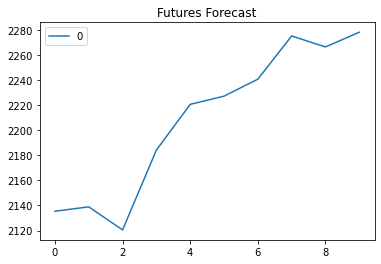

In [12]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [13]:
# save model
results.save('eth_model1.pkl')

# ARIMA Model using a Lag of 2

In [14]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(6, 1, 0))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [15]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -1279.730
Method:                       css-mle   S.D. of innovations            132.212
Date:                Tue, 03 Aug 2021   AIC                           2575.460
Time:                        20:07:16   BIC                           2601.966
Sample:                             1   HQIC                          2586.183
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4497     11.886      0.627      0.531     -15.846      30.746
ar.L1.D.y     -0.0459      0.069     -0.665      0.506      -0.181       0.089
ar.L2.D.y      0.1170      0.069      1.698      0.089      -0.018       0.252
ar.L3.D.y      0.0286      0.069      0.412      0.680      -0.107       0.164
ar.L4.D.y      0.0590      0.069      0.850      0.395      -0.077       0.195
ar.L5.D.y     -0.0998      0.069     -1.446      0.148      -0.235       0.035
ar.L6.D.y      0.1641      0.069      2.375      0.018       0.029       0.300
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1914           -0.0000j            1.1914           -0.5000
AR.2           -0.6056           -1.1670j            1.3148           -0.3262
AR.3           -0.6056           +1.1670j            1.3148            0.3262
AR.4            1.3596           -0.0000j            1.3596           -0.0000
AR.5            0.8256           -1.2227j            1.4753           -0.1555
AR.6            0.8256           +1.2227j            1.4753            0.1555
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

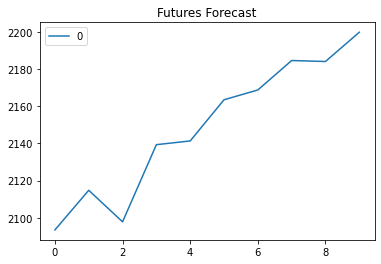

In [16]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [17]:
# save model
results2.save('eth_model2.pkl')